# Exploratory Data Analysis

## Initial Settings
- Importing packages and dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8)
import os

In [2]:
path = os.path.join('..', 'data', 'lung-cancer-patient.csv')
df = pd.read_csv(path)

---

## Basic Info
- **309 rows x 16 columns**
- 15 factors + 1 outcome `LUNG_CANCER`
- **No missing value**
- **Column names are not consistent**: some are separated by spaces, while others by underscores
- Most data types are _integer_, except for `GENDER` and `LUNG_CANCER`, but **most of them seem to be _category_** (recommended) or _object_

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


---

## Data Cleaning

### Duplicates
- **33 duplicates**
- **276 rows** are left after duplicates are dropped out

In [6]:
df.duplicated().sum()

33

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

len(df)

276

### Column Names
- All space separators are replaced by **underscores**

In [8]:
list_col = []

for col in df.columns:
    if col[-1] == ' ':
        list_col.append(col[:-1])
    else:
        list_col.append(col.replace(' ', '_'))

df.columns = list_col

df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

### Data Types
- All data types, except for `AGE`, should be converted into **_category_ with binary numerical values (encoding)** for modeling process
    - `GENDER`: 'M' for Male / 'F' for female -> 1 / 0
    - `LUNG_CANCER`: 'YES' / 'NO' -> 1 / 0
    - Others: 2 for Yes / 1 for No -> 1 / 0

In [9]:
for col in df.columns:
    if col != 'AGE':
        print(col + ':', df[col].unique())

GENDER: ['M' 'F']
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC_DISEASE: [1 2]
FATIGUE: [2 1]
ALLERGY: [1 2]
WHEEZING: [2 1]
ALCOHOL_CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS_OF_BREATH: [2 1]
SWALLOWING_DIFFICULTY: [2 1]
CHEST_PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


In [10]:
dict_repl = {'M': 1, 'F': 0, 'YES': 1, 'NO': 0, 2: 1, 1: 0}
cat_type = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=True)

df = df.replace(dict_repl)

for col in df.columns:
    if col != 'AGE':
        df[col] = df[col].astype(cat_type)
        
df.dtypes

GENDER                   category
AGE                         int64
SMOKING                  category
YELLOW_FINGERS           category
ANXIETY                  category
PEER_PRESSURE            category
CHRONIC_DISEASE          category
FATIGUE                  category
ALLERGY                  category
WHEEZING                 category
ALCOHOL_CONSUMING        category
COUGHING                 category
SHORTNESS_OF_BREATH      category
SWALLOWING_DIFFICULTY    category
CHEST_PAIN               category
LUNG_CANCER              category
dtype: object

---

## Feature Engineering

### Categorical Values
- Most _categories_ are well distributed, but only **`LUNG_CANCER` is not**
- For further improvement, **adding more samples with no lung cancer** might be able to enhance model accuracy

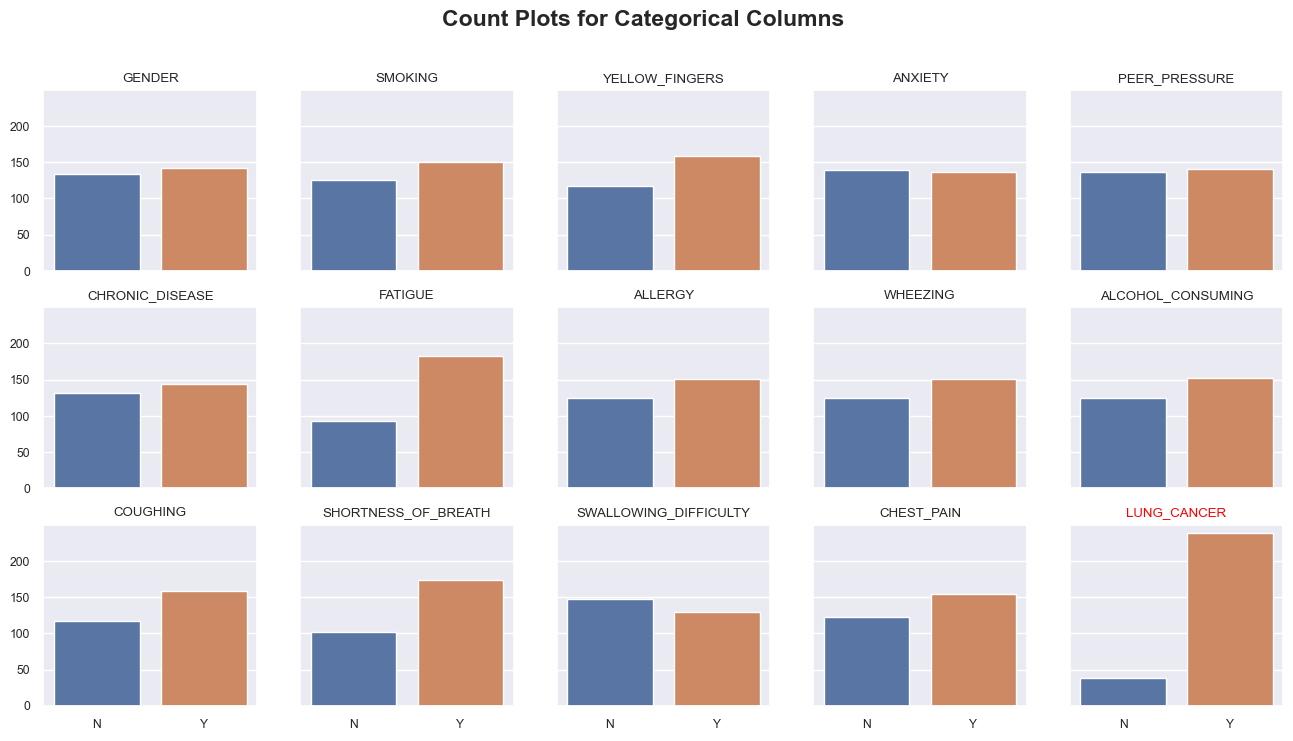

In [11]:
df_cat = df.drop('AGE', axis=1)

fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(16,8))
index = 0

for col in df_cat:
    r = index // 5
    c = index % 5
    
    g = sns.countplot(ax=axes[r, c], x=df_cat[col])
    g.set_xticklabels(['N', 'Y'])
    g.set(xlabel=None, ylabel=None, title=col)
    
    if col == 'LUNG_CANCER':
        g.set_title(col, fontdict={'color': 'red'})
    
    index += 1

plt.suptitle('Count Plots for Categorical Columns', size='xx-large', weight='bold')

plt.show()

### Numerical Values
- `AGE` is almost nomrally distributed, except for **one sample of 21 years old**
- **Removing that outlier** is acceptable and recommended

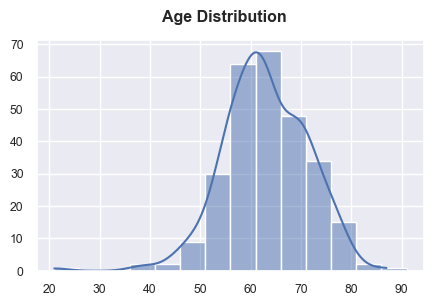

In [12]:
df_num = df['AGE']

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.histplot(data=df_num, binwidth=5, kde=True)
g.set(xlabel=None, ylabel=None)
plt.suptitle('Age Distribution', size='large', weight='bold')

plt.show()

### Correlation
- **No apparent pattern or collinearity**

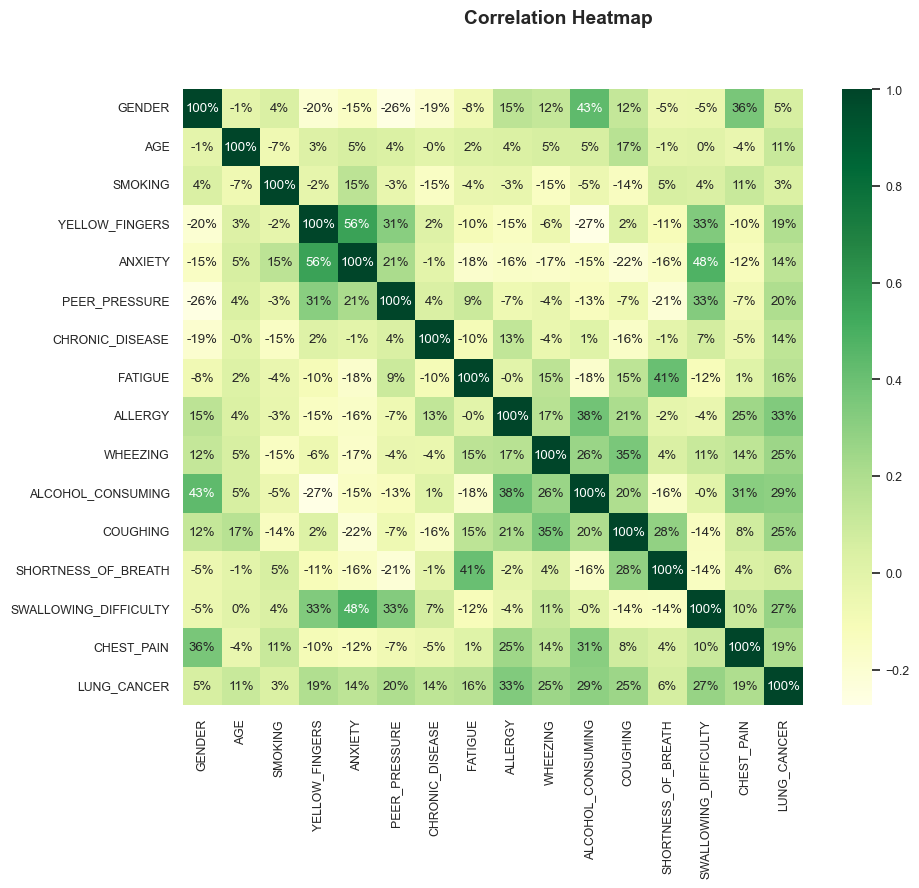

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='YlGn', annot=True, fmt='.0%')
plt.suptitle('Correlation Heatmap', size='x-large', weight='bold')

plt.show()